In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
## for correlation matrices
import seaborn as sns
%matplotlib inline
## for linear models
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ConfusionMatrix


from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing

from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report



C:\Users\BudBe\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Must download from http://web.stanford.edu/group/deepsolar/deepsolar_tract.csv and delete the first ","
df = pd.read_csv("deepsolar_tract.csv", encoding = "utf-8")


In [3]:
# Remove all deepsolar inputs

df = df.drop(columns=['solar_system_count'], axis = 1)
df = df.drop(columns=['total_panel_area'], axis = 1)
df = df.drop(columns=['solar_panel_area_per_capita'], axis =1)

df = df.drop(columns=['solar_panel_area_divided_by_area'], axis = 1)
df = df.drop(columns=['tile_count_residential'], axis = 1)
df = df.drop(columns=['tile_count_nonresidential'], axis = 1)
df = df.drop(columns=['solar_system_count_residential'], axis =1)

df = df.drop(columns=['solar_system_count_nonresidential'], axis = 1)
df = df.drop(columns=['total_panel_area_residential'], axis = 1)
df = df.drop(columns=['total_panel_area_nonresidential'], axis = 1)
df = df.drop(columns=['number_of_solar_system_per_household'], axis =1)

# Remove all unique identifiers, objects, and booleans
df = df.drop(columns=['county',
                      'state',
                     'electricity_price_transportation',
                     'voting_2016_dem_win',
                     'voting_2012_dem_win',
                     'fips'])



In [4]:
df['has_tiles'] = (df.tile_count > 0).mul(1)

In [5]:
df = df.drop('tile_count', axis = 1)

In [7]:
df = df.dropna()

In [9]:
# Define X and y
y = df['has_tiles']
X = df.drop('has_tiles', axis = 1)
# Split the data into training and test sets
# from sklearn.model_selection import train_test_split

#ADD STRATIFIED HERE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
#print(y_train.value_counts(),'\n\n', y_test.value_counts())

# SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
print(y_train.value_counts(),'\n\n', y_test.value_counts())

1    31209
0    31209
Name: has_tiles, dtype: int64 

 1    10392
0     3133
Name: has_tiles, dtype: int64


In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
parameters = {'penalty':['l1', 'l2'], 'C':[.001, .005, .0005, .0009]}
#clf = classifier
clf = GridSearchCV(LogisticRegression(solver='saga'), parameters, cv = 5)
clf.fit(X_train, y_train)

C:\Users\BudBe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\BudBe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\BudBe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\BudBe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\BudBe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.005, 0.0005, 0.0009],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [16]:
best_clf=clf.best_estimator_

In [17]:
#fit the data using the best model and look at the score given test data
best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)

0.7696857670979668

C:\Users\BudBe\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


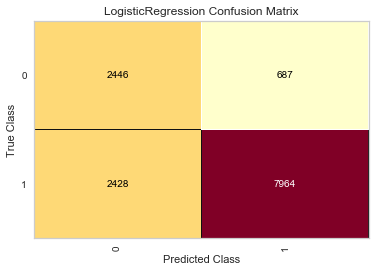

In [18]:
cm = ConfusionMatrix(best_clf)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

In [19]:
y_pred=best_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.78      0.61      3133
           1       0.92      0.77      0.84     10392

    accuracy                           0.77     13525
   macro avg       0.71      0.77      0.72     13525
weighted avg       0.82      0.77      0.78     13525



In [46]:
test = X_test[(y_test == 0) & (y_pred[:] == 1)]
hello = pd.DataFrame(test)


In [49]:
hello.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.022580,0.712985,1.859880,-0.554974,0.864903,0.087179,0.691065,1.295811,0.074465,1.330075,...,-0.131613,0.031694,-0.725382,-0.216983,-0.374377,-0.102047,-0.601401,-0.495724,-0.526502,-0.547864
1,-0.716522,-0.644868,0.589836,-0.411807,0.323629,0.453883,-0.694021,0.091786,0.137914,0.074963,...,0.187068,0.640279,0.580349,2.215166,-0.374377,-0.102047,0.386581,0.940909,-0.526502,-0.469219
2,0.434062,0.021803,0.425729,-0.554974,0.678175,0.898102,0.190375,0.702358,0.975444,0.788716,...,-0.397180,-0.171167,-0.507760,-0.548640,-0.374377,-0.102047,-0.107410,-0.495724,-0.526502,-0.661899
3,0.589378,-0.007609,-1.346149,-0.411807,-1.527103,-0.956288,0.227810,-1.232071,-0.001674,-0.942582,...,0.027728,1.857449,1.233215,0.667435,-0.374377,-0.102047,1.312813,0.940909,1.300826,1.835072
4,-0.211035,0.492395,0.204542,0.465085,-0.118372,0.090160,0.377549,0.298843,-0.077813,0.392420,...,-0.875201,-1.185475,-1.378247,-1.543609,-0.374377,-0.102047,-0.724898,-0.495724,-0.526502,-0.543932
